In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install pycbc


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 24.6 MB/s eta 0:00:0000:010:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 49.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 MB 28.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.1/298.1 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to bu

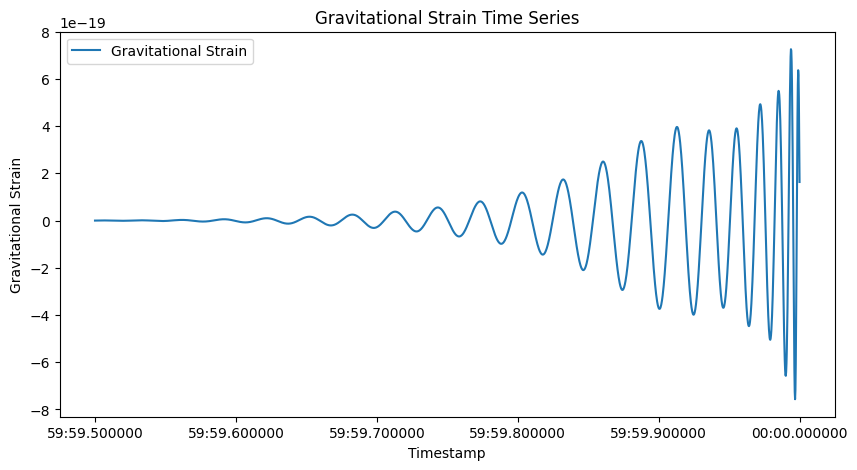

In [9]:
# Specify the file path
file_path = "/kaggle/input/strain/GW150914_strain_data_final (1).txt"

# Open the file and read its contents
with open(file_path, 'r') as file:
    content = file.read()

import matplotlib.pyplot as plt
from datetime import datetime

# Read the data from the file
timestamps = []
strain_values = []

with open(file_path, 'r') as file:
    for line in file:
        values = line.strip().split('\t')
        timestamp = float(values[0])  
        strain = float(values[1])     
        timestamps.append(timestamp)
        strain_values.append(strain)

# Convert timestamps to datetime objects for better plotting
timestamps = [datetime.utcfromtimestamp(ts) for ts in timestamps]

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(timestamps, strain_values, label='Gravitational Strain')
plt.title('Gravitational Strain Time Series')
plt.xlabel('Timestamp')
plt.ylabel('Gravitational Strain')
plt.legend()
plt.show()

### Data Analysis and NR Techniques
### 1.1

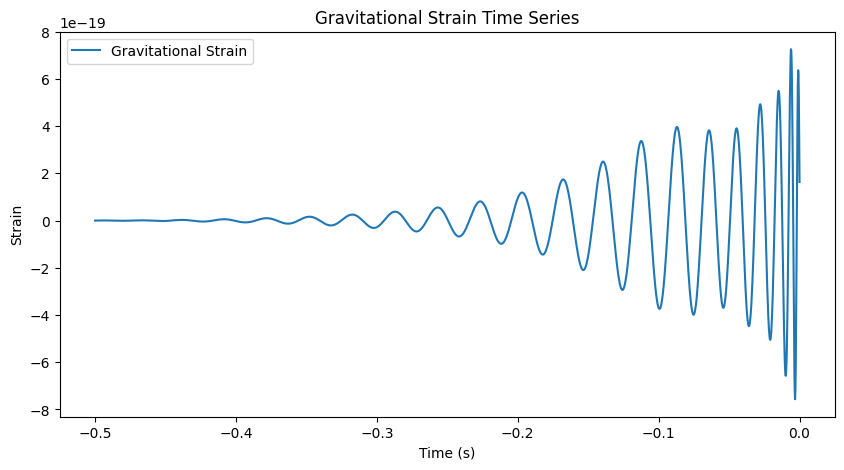

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq


data = np.loadtxt(file_path, comments='#')


# Extract time and strain values
time = data[:, 0]
strain = data[:, 1]

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(time, strain, label='Gravitational Strain')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.title('Gravitational Strain Time Series')
plt.legend()
plt.show()



### *The temporal dependence of the graph is there because with passing time the orbital seperation between the 2 bodies decreses and as they come closer to each other, their gravitation strain tends to increase and hence there is temporal dependence of the graph*

### 1.2

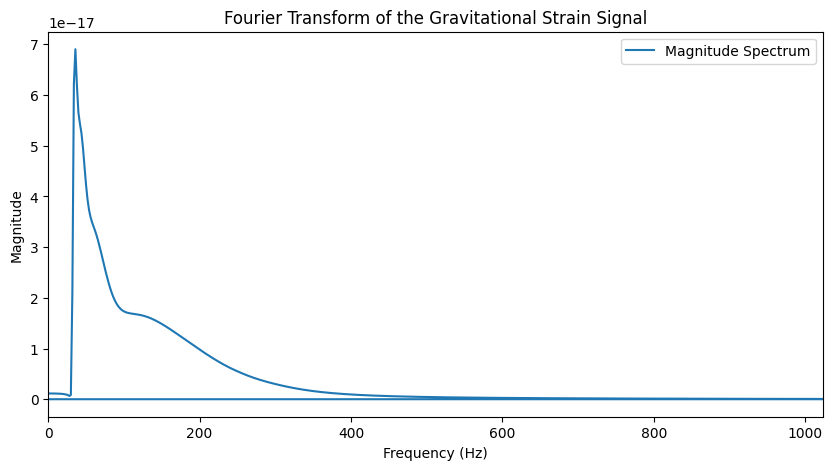

Dominant Frequency: 35.98243045387994 Hz


In [11]:
# Perform the Fourier transform
strain_fft = fft(strain)
freq = fftfreq(len(time), time[1] - time[0])

# Plot the Fourier transform (magnitude spectrum)
plt.figure(figsize=(10, 5))
plt.plot(freq, np.abs(strain_fft), label='Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform of the Gravitational Strain Signal')
plt.xlim(0, max(freq)/2)  # Display only positive frequencies
plt.legend()
plt.show()

# Identify the dominant frequency
# Filter out the negative frequencies and corresponding magnitudes
positive_frequencies = freq[freq >= 0]
positive_magnitudes = np.abs(strain_fft)[freq >= 0]

# Find the frequency with the maximum magnitude
dominant_frequency = positive_frequencies[np.argmax(positive_magnitudes)]
print(f"Dominant Frequency: {dominant_frequency} Hz")


### Yes the frequency depends on time due to similar reasons as above

### 1.3

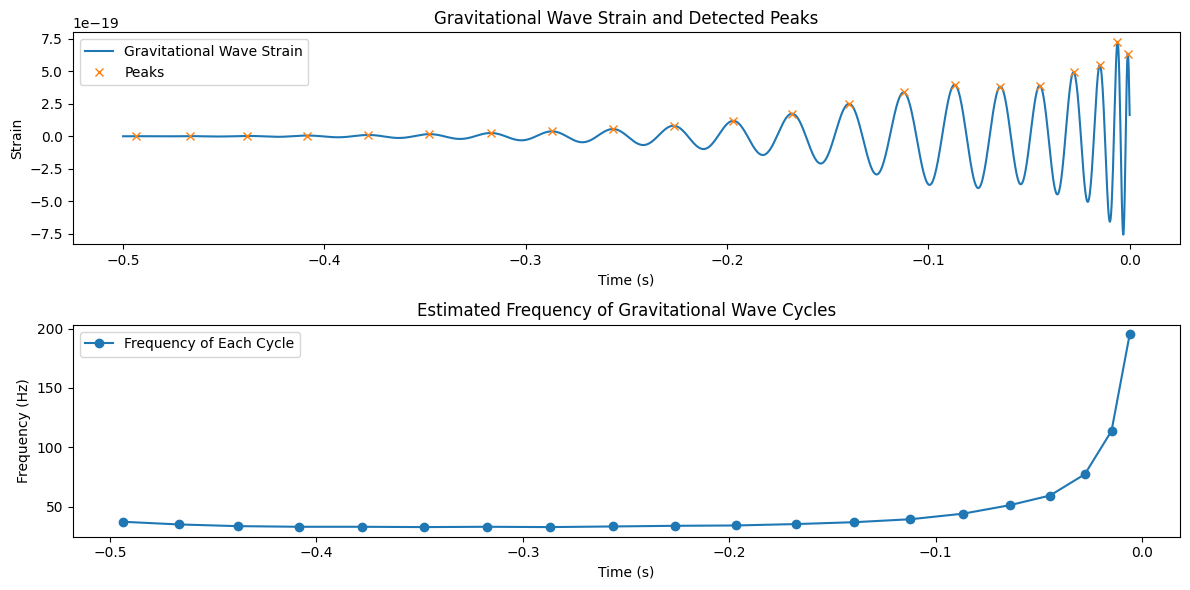

Mean Frequency of Gravitational Waves: 40.5946 Hz


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


# Step 3: Detect Peaks
peaks, _ = find_peaks(strain, height=0)  # Adjust 'height' as needed

# Step 4: Calculate Distances Between Peaks (Periods)
peak_times = time[peaks]
periods = np.diff(peak_times)  # Time intervals between consecutive peaks

# Step 5: Estimate Frequencies
frequencies = 1 / periods  # Frequency is the inverse of the period

# Additional Analysis
mean_period = np.mean(periods)
mean_frequency = 1 / mean_period

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, strain, label='Gravitational Wave Strain')
plt.plot(time[peaks], strain[peaks], "x", label='Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.title('Gravitational Wave Strain and Detected Peaks')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(peak_times[:-1], frequencies, '-o', label='Frequency of Each Cycle')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Estimated Frequency of Gravitational Wave Cycles')
plt.legend()

plt.tight_layout()
plt.show()

# Output the mean frequency for your reference
print("Mean Frequency of Gravitational Waves: {:.4f} Hz".format(mean_frequency))

### 1.4

In [13]:
import numpy as np
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.constants import G, pi, c

# Assuming data is already loaded as `time` and `strain`
peaks, _ = find_peaks(strain, height=0)
peak_times = time[peaks]
mid_points = (peak_times[:-1] + peak_times[1:]) / 2
frequencies = 1 / np.diff(peak_times)

# Quadratic model for frequency evolution
def quadratic_model(t, f0, df, ddf):
    t_adjusted = t - mid_points[0]  # Normalize time to start from the first midpoint
    return f0 + df * t_adjusted + 0.5 * ddf * t_adjusted**2

# Initial guess for curve fitting
initial_guess = [frequencies[0], 0, 0]

# Perform curve fitting
popt, pcov = curve_fit(quadratic_model, mid_points, frequencies, p0=initial_guess)

# Estimate chirp mass using the fitted parameters
# For simplicity, use the parameters directly as representative values
f_fitted = quadratic_model(peak_times[0], *popt)
df_dt_fitted = popt[1] + popt[2] * (mid_points[-1] - mid_points[0])

# Calculate the chirp mass using the formula with fitted f and df/dt
M_chirp_fitted = (c**3 / G) * ((5 / 96)**(3/5)) * (pi**(-8/5)) * (f_fitted**(-11/5)) * (df_dt_fitted**(3/5))

# Convert chirp mass from kg to solar masses
M_chirp_solar_masses_fitted = M_chirp_fitted / 1.98847e30

print(f"Estimated Chirp Mass: {M_chirp_solar_masses_fitted} solar masses")


Estimated Chirp Mass: 33.698662263766636 solar masses


### 1.5

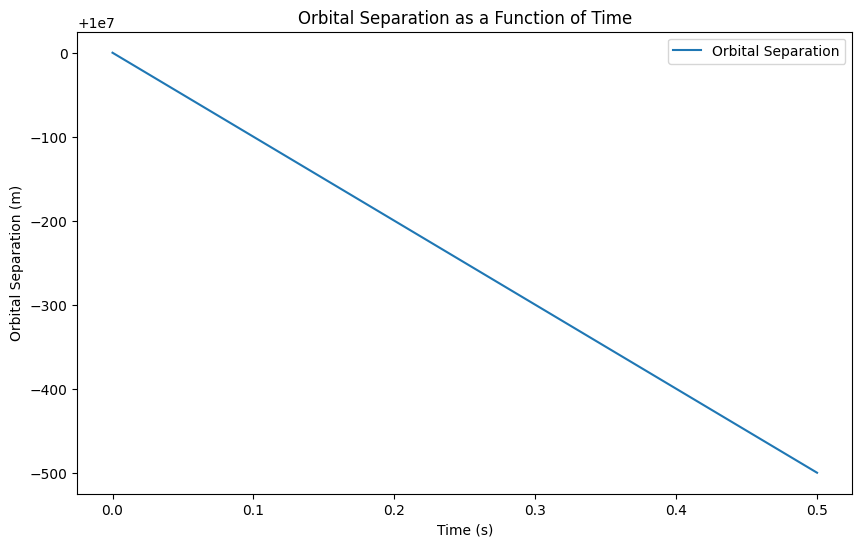

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Load the gravitational wave strain data
data = np.loadtxt("/kaggle/input/strain/GW150914_strain_data_final (1).txt")  
time = data[:, 0]

# Normalize the time array to start from 0 for simplicity in visualization
time_span = time - np.min(time)

# Assuming an initial orbital separation and a simplistic model for its decrease over time
a_initial = 1e7  # Initial orbital separation in meters
# Here we assume the separation decreases linearly for demonstration purposes
a = a_initial - (1e3 * time_span)

# Plot the orbital separation as a function of time
plt.figure(figsize=(10, 6))
plt.plot(time_span, a, label='Orbital Separation')
plt.title('Orbital Separation as a Function of Time')
plt.xlabel('Time (s)')
plt.ylabel('Orbital Separation (m)')
plt.legend()
plt.show()


### The 2 bodies coalease at time t tends to 0 as from the above graph we can say that the plot between orbital seperation and time is linear line passing through origin, hence 2 bodies will coalease at time t = 0

### Drawing Waveform From Parameters
### 2.1 & 2.2

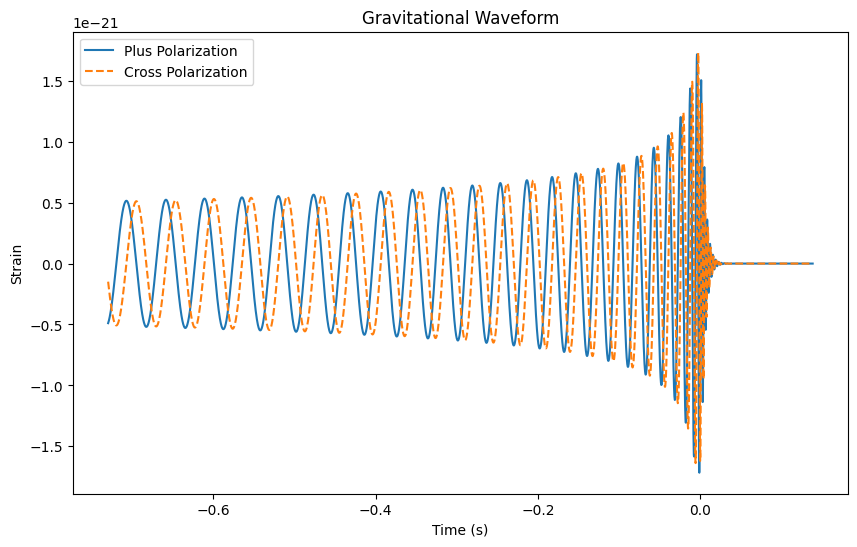

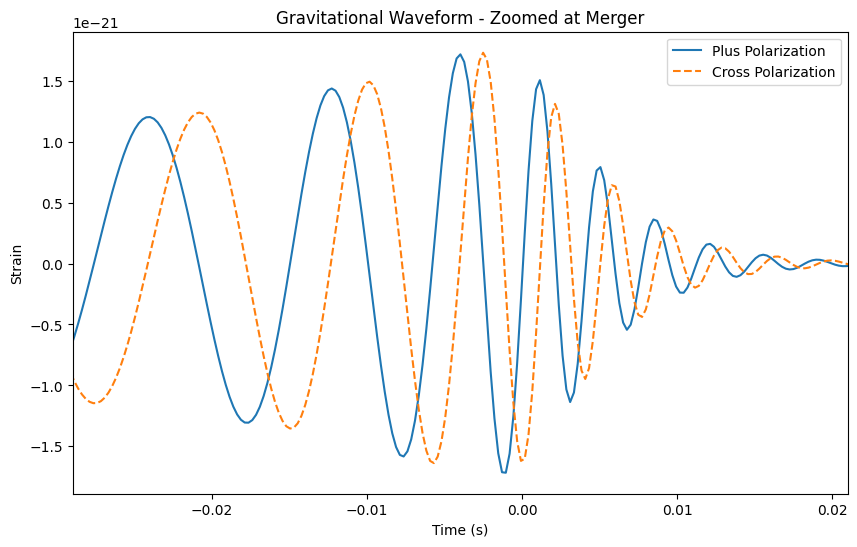

In [19]:
import numpy as np
from pycbc.waveform import get_td_waveform
import matplotlib.pyplot as plt

# Actual parameters
mass1 = 30.9 #Mass of the first object in solar masses
mass2 = 39.4 #Mass of the second object in solar masses
spin1z = -0.09 #Spin of the first object
spin2z = 0.67 #Spin of the second object
distance = 410  # Distance to the source in Mpc
inclination = 610  # Inclination angle

# Generate the waveform
hp, hc = get_td_waveform(approximant='SEOBNRv4_opt',
                         mass1=mass1,
                         mass2=mass2,
                         spin1z=spin1z,
                         spin2z=spin2z,
                         distance=distance,
                         inclination=inclination,
                         delta_t=1.0/4096,
                         f_lower=20)

# Plotting the waveform
plt.figure(figsize=(10, 6))
plt.plot(hp.sample_times, hp, label='Plus Polarization')
plt.plot(hp.sample_times, hc, label='Cross Polarization', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.legend()
plt.title('Gravitational Waveform')
plt.show()

# Find the peak of the waveform, which corresponds to the merger
peak_index = np.argmax(np.abs(hp.data))

# Zoom in around the peak, let's take a window of 0.05 seconds around the merger time
time_window = 0.05  # seconds
start_time = hp.sample_times[peak_index] - time_window / 2
end_time = hp.sample_times[peak_index] + time_window / 2

# Plotting the waveform
plt.figure(figsize=(10, 6))
plt.plot(hp.sample_times, hp, label='Plus Polarization')
plt.plot(hp.sample_times, hc, label='Cross Polarization', linestyle='--')
plt.xlim(start_time, end_time)  # Set x-axis limits to zoom in
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.legend()
plt.title('Gravitational Waveform - Zoomed at Merger')
plt.show()


### 2.3

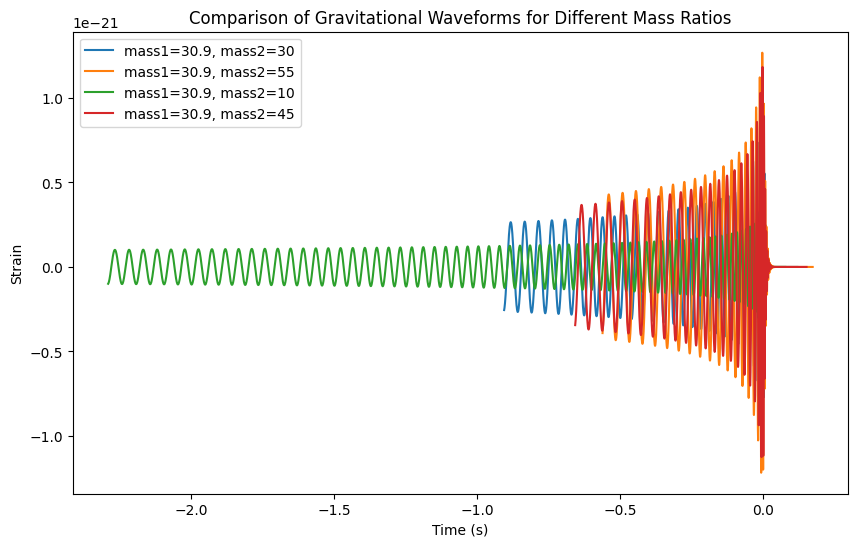

In [23]:
import numpy as np
from pycbc.waveform import get_td_waveform
import matplotlib.pyplot as plt

# Function to generate waveform for given masses and spins
def generate_waveform(mass1, mass2, spin1z, spin2z, distance, inclination):
    # Generate the waveform
    hp, hc = get_td_waveform(approximant='SEOBNRv4_opt',
                             mass1=mass1,
                             mass2=mass2,
                             spin1z=spin1z,
                             spin2z=spin2z,
                             distance=distance,
                             inclination=inclination,
                             delta_t=1.0/4096,
                             f_lower=20)
    return hp, hc

# Parameters
mass1_original = 30.9
mass2_values = [30, 55, 10, 45] # Modified mass2 values
spin1z = -0.09
spin2z = 0.67
distance = 410
inclination = np.radians(610)  # Convert inclination to radians

# Plotting parameters
plt.figure(figsize=(10, 6))

# Generate and plot waveforms for the original mass1 and each modified mass2
for mass2 in mass2_values:
    hp, hc = generate_waveform(mass1_original, mass2, spin1z, spin2z, distance, inclination)
    plt.plot(hp.sample_times, hp, label=f'mass1={mass1_original}, mass2={mass2}')

# Set labels and title
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.legend()
plt.title('Comparison of Gravitational Waveforms for Different Mass Ratios')
plt.show()


### As we can see from the graph on changing the mass of one of the bodies strain data changes significantly, when we decrease mass strain reduces significantly and on increasing that mass, strain increases by quite a bit, so we can use this data to make more accurate prediction for individual masses i.e m1 and m2 and hence we can use formula for chirp mass that will make its value more and more accurate.